In [3]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

def build_jc_hamiltonian(N, w_c, w_a, g):

    a = tensor(destroy(N), qeye(2))
    
    sz = tensor(qeye(N), sigmaz())  
    sm = tensor(qeye(N), sigmam()) 

    a_dag = a.dag()
    sp = sm.dag()  
    
    H_cavity = w_c * a_dag * a
    H_atom   = (w_a * 0.5) * sz
    H_int    = g * (a_dag * sm + a * sp) 
    H = H_cavity + H_atom + H_int
    
    return H

Hamiltonian constructed successfully:


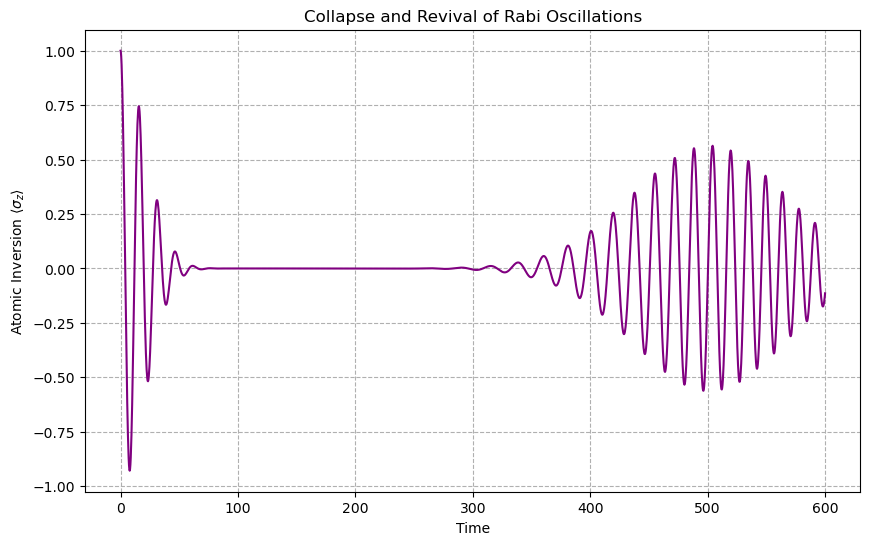

In [4]:
N_cutoff = 60        
omega_c  = 1.0
omega_a  = 1.0
g_coup   = 0.05

H_sys = build_jc_hamiltonian(N_cutoff, omega_c, omega_a, g_coup)

print("Hamiltonian constructed successfully:")

alpha = np.sqrt(15) 

psi0 = tensor(coherent(N_cutoff, alpha), basis(2, 0))

tlist = np.linspace(0, 600, 2000)

sigma_z_op = tensor(qeye(N_cutoff), sigmaz())

output = mesolve(H_sys, psi0, tlist, [], [sigma_z_op])

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(tlist, output.expect[0], color="purple", lw=1.5)

ax.set_xlabel('Time')
ax.set_ylabel('Atomic Inversion $\langle \sigma_z \\rangle$')
ax.set_title('Collapse and Revival of Rabi Oscillations')
ax.grid(True, which="both", linestyle="--")

plt.show()